In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint
from scipy.linalg import eigh_tridiagonal

In [2]:
N = 2000
dy = 1/N
y = np.linspace(0, 1, N+1)

In [3]:
def mL2V(y):
    return 1000*(y-1/2)**2  

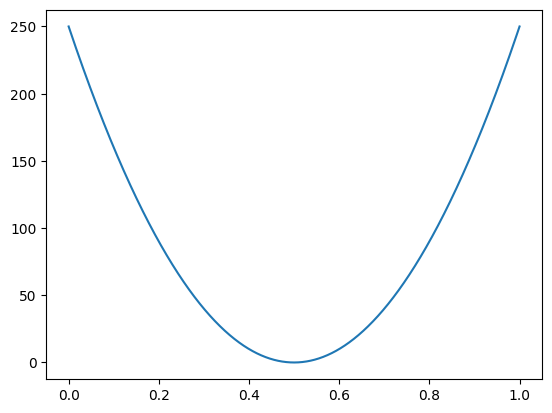

In [4]:
V= mL2V(y)
plt.plot(y,V)

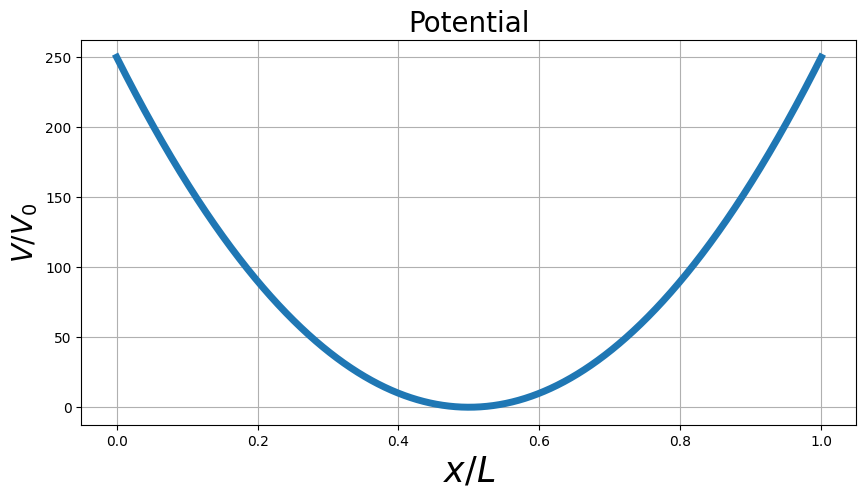

In [5]:
plt.figure(figsize=(10,5))
plt.plot(y, mL2V(y), lw=5)
plt.title('Potential', fontsize=20)
plt.ylabel('$V/V_0$', fontsize=20)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()
plt.savefig('v3p1.png', dpi=200)


In [6]:
d = 1/dy**2 + mL2V(y)[1:-1]
e = -1/(2*dy**2)*np.ones(len(d)-1)

In [7]:
w, v = eigh_tridiagonal(d, e)

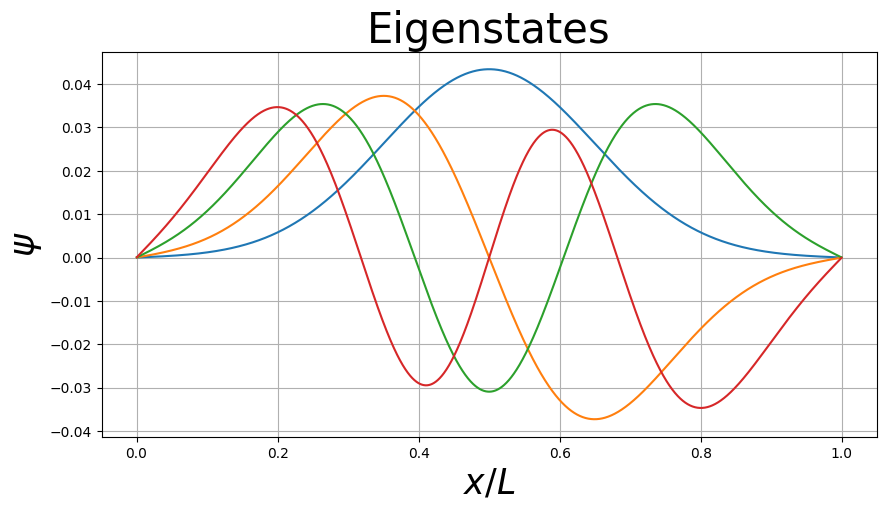

In [8]:
plt.figure(figsize=(10,5))
plt.plot(y[1:-1], v.T[0])
plt.plot(y[1:-1], v.T[1])
plt.plot(y[1:-1], v.T[2])
plt.plot(y[1:-1], v.T[3])
plt.title('Eigenstates', fontsize=30)
plt.ylabel('$\psi$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()
plt.savefig('v3p2.png', dpi=200)

Text(0, 0.5, '$mL^2 E/\\hbar^2$')

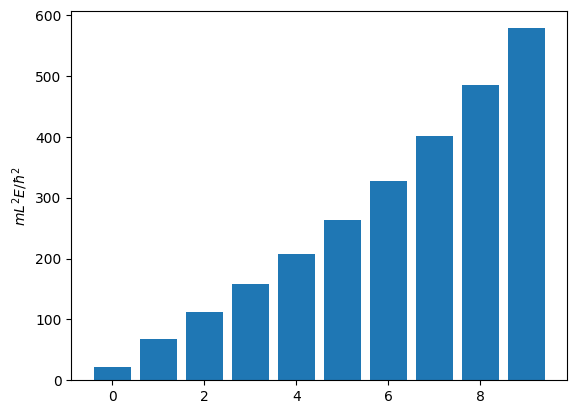

In [9]:
plt.bar(np.arange(0, 10, 1), w[0:10])
plt.ylabel('$mL^2 E/\hbar^2$')

In [10]:
x = np.linspace(0, 1, 1000)
y = np.sin(20*x) * x**(1/2) 

Text(0, 0.5, 'Potential')

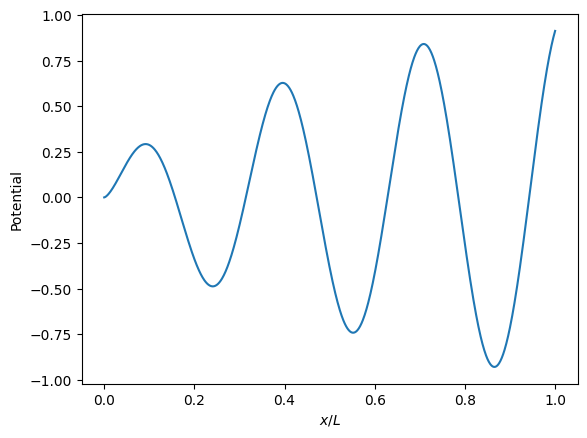

In [11]:
plt.plot(x, y)
plt.xlabel('$x/L$')
plt.ylabel('Potential')

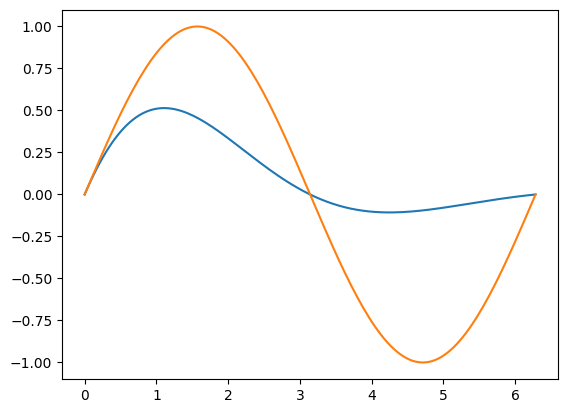

In [12]:
import numpy as np
x = np.linspace(0, 2*np.pi, 150)
f = np.exp(-0.5*x)* np.sin(x)
g = np.sin(x)
plt.plot(x,f)
plt.plot(x,g)

In [13]:
pip install --upgrade findiff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from findiff import FinDiff

In [15]:
d_dx=FinDiff(0,1)

In [16]:
df_dx=d_dx(f)
dg_dx=d_dx(g)

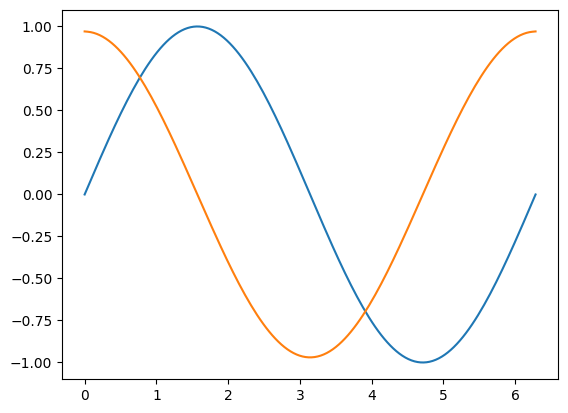

In [17]:
plt.plot(x, g)
plt.plot(x,23*dg_dx)

In [18]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
from findiff import FinDiff
x = np.linspace(-8, 8, 201) # define our grid
energies, states = eigs(
            -0.5 * FinDiff(0, x[1]-x[0], 2).matrix(x.shape) +                                        
                        diags(0.5*x**4),
                        k=10, which='SR')

(-6.0, 6.0)

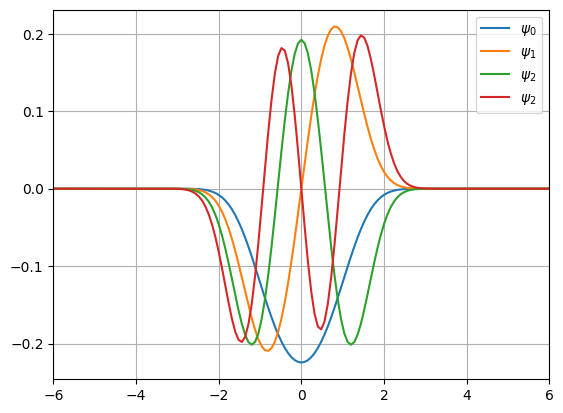

In [19]:
import matplotlib.pyplot as plt
plt.plot(x, states[:, 0].real, label='$\psi_0$')
plt.plot(x, states[:, 1].real, label='$\psi_1$')
plt.plot(x, states[:, 2].real, label='$\psi_2$')
plt.plot(x, states[:, 3].real, label='$\psi_2$')
plt.grid()
plt.legend()
plt.xlim(-6, 6)